In [1]:
#imports
#imports
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup, NavigableString, Tag
import re
import time
import random
import sys
pd.set_option('display.max_colwidth', None)

from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
from scipy import sparse
from matplotlib import pyplot as plt
import utils as ut

In [2]:
movie_df = pd.read_csv('./data/movie_dvd.csv', usecols=['customer_id', 'product_id', 'product_title', 'star_rating', 'review_date'])

In [3]:
movie_df.head(1) #preview

,customer_id,product_id,product_title,star_rating,review_date
0,27288431,B005T4ND06,"Yoga for Movement Disorders DVD: Rebuilding Strength, Balance, and Flexibility for Parkinson's Disease and Dystonia",5.0,2015-08-31


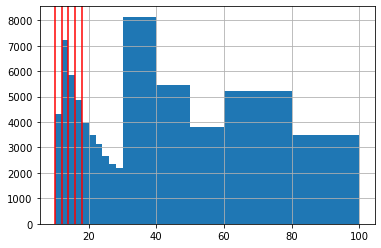

In [4]:
#movie_df.groupby('product_id')['product_id'].value_counts().sort_values()
movie_df.groupby('product_id')['product_id'].value_counts().sort_values().hist(
    bins=[10,12,14,16,18,20,22,24,26,28,30,40,50,60,80,100])
for n in range(10,20,2):
    plt.axvline(x=n, color='red')

I made this histograme to see if there was a decent argument to setting a higher cutoff than minimum 10 reviews per product given that this data set was so big. Ultimately I decided against cutting any more items.

In [5]:
sys.getsizeof(movie_df)/1_000_000_000 #original size

1.060563131

Former size of data (before sparse conversion):  

``` Python

Dropping 11384 duplicate values.
Unique customers: 1867520
Unique products: 76336
Size of matrix: (72385, 1867520)
Size of Recommender df: 41.923352184 GB
Size of Lookup df: 0.838147391 GB
    
```


In [6]:
movie_recommender = ut.make_recommender_df(movie_df)
movie_recommender.head()

Dropping 11384 duplicate values.
Unique customers: 1867543
Unique products: 76336
Size of matrix: (72385, 1867543)
Making df dictionary...
Dictionary made - sparse dataframe under construction...
Size of Recommender df: 1.843095412 GB


,National Lampoon's Pucked,MARIZA,Monarchy Complete Collection,Goodbye Charlie,Cast a Giant Shadow [Blu-ray],Dragon Ball Z: Kai: Part Two [Blu-ray],"Shepherding a Child's Heart, Tedd Tripp - DVD Set",A Christmas Story (Ultimate Collector's Edition),Battlestar Galactica: Season 3 [Blu-ray],Grey's Anatomy - Season 1 DVD (2005),...,United 93 (Widescreen Edition),Psych: The Complete Third Season,Magical Shopping Arcade Abenobashi Vols. 1-3 (Boxed Set),Lady Caroline Lamb,Sundown (artisan),Editing How-to Videos with Sony Vegas Movie Studio,Road to Morocco,America - In Concert,Little Britain: The Complete Collection,Anchorman 2: The Legend Continues
National Lampoon's Pucked,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.991978,1.0,1.0,0.989356,1.0,1.0,1.0,1.0,1.00000
MARIZA,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.00000
Monarchy Complete Collection,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.00000
Goodbye Charlie,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,0.97466
Cast a Giant Shadow [Blu-ray],1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,1.00000


In [7]:
movie_recommender.shape

(72385, 72385)

In [8]:
movie_recommender.to_pickle('./pickles/movie_recommender.pkl')